In [1]:
# pip install statsmodels

Active code page: 65001
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

data = {'x':[1, 2, 3, 4, 5], 'y':[1, 3, 4, 6, 5]}
df = pd.DataFrame(data)

df

,x,y
0,1,1
1,2,3
2,3,4
3,4,6
4,5,5


In [4]:
import statsmodels.formula.api as smf

lm_model = smf.ols(formula='y ~ x', data=df).fit()

In [5]:
lm_model.params

Intercept    0.5
x            1.1
dtype: float64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

(0.0, 5.0)

<Figure size 864x720 with 0 Axes>

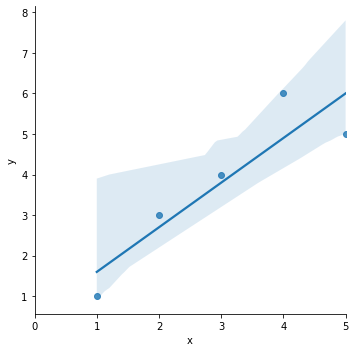

In [9]:
plt.figure(figsize=(12, 10))
sns.lmplot(x='x', y='y', data=df)
plt.xlim([0, 5])

## 잔차 평가
- 잔차는 평균이 0인 정규분포를 따르는 것이어야 함.
- 잔차 평가는 잔차의 평균이 0이고 정규분포를 따르는 지 확인

In [11]:
resid = lm_model.resid
resid

0   -0.6
1    0.3
2    0.2
3    1.1
4   -1.0
dtype: float64

## 결정 계수 (R-Squared)
- y_hat은 예측된 값
- 예측 값과 실제 값(y)이 일치하면 결정계수는 1이 됨(즉, 결정계수가 높을수록 좋은 모델)

In [14]:
import numpy as np

mu = np.mean(df['y'])
y = df['y']

y_hat = lm_model.predict()
np.sum((y_hat - mu)**2) / np.sum((y - mu)**2)

0.8175675675675671

In [15]:
lm_model.rsquared

0.8175675675675677

C:\Anaconda3\envs\ds_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

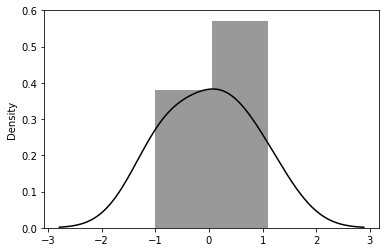

In [17]:
sns.distplot(resid, color='black')